In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('sample_data/mnist_train_small.csv')

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, num_classes=len(np.unique(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.7393 - loss: 0.8171 - val_accuracy: 0.9607 - val_loss: 0.1241
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9491 - loss: 0.1662 - val_accuracy: 0.9730 - val_loss: 0.0925
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9655 - loss: 0.1100 - val_accuracy: 0.9778 - val_loss: 0.0677
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9715 - loss: 0.0834 - val_accuracy: 0.9822 - val_loss: 0.0521
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9783 - loss: 0.0748 - val_accuracy: 0.9822 - val_loss: 0.0526
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9845 - val_loss: 0.0478
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9840 - loss: 0.0489 - val_accuracy: 0.9858 - val_loss: 0.0475
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9853 - loss: 0.0474 - 

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9856 - loss: 0.0481
Test Accuracy: 98.45%


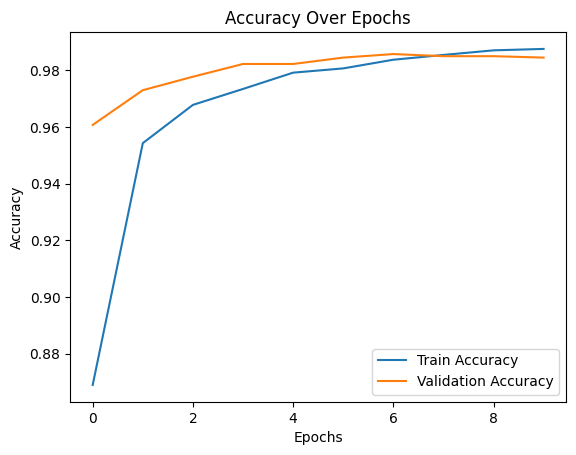

In [5]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
